In [1]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import entropy
from scipy.optimize import curve_fit

## Declaire File Path ##

In [2]:
files = [
    '../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]
files2 = [
    '../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]


files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]

files3 = [
    '../proceed_data/proceed_data_v_half/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/150_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/170_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/186_ux_uy_data.txt',
]

files3_vor = [
    '../proceed_data/proceed_data_v_half/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/150_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/170_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/186_vor_data.txt',
]


## function ##

In [3]:
def sep(data):
    df = pd.read_csv(data)
    ux = df['ux'].values
    uy = df['uy'].values
    
    return ux, uy
    
def resizing(ux, uy):
    N = 1024
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    return ux_2d, uy_2d

In [4]:
# vorticity
def vor_stat(file, entropies, std_devs, sigma, mean_devs, time):

    t = float(file.split('/')[-1].split('_')[0])

    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values  # NaN 제거

    data = data[data != 0]

    # histogram
    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    # 히스토그램 계산
    hist, bin_edges = np.histogram(data, bins=100, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t}")
    
    return entropies, std_devs, sigma, mean_devs, time

In [5]:
def vel_stat(file, entropies, std_devs, sigma, mean_devs, time):

    t = float(file.split('/')[-1].split('_')[0])
    
    data = sep(file)
    data = np.array(data)

    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    hist, bin_edges = np.histogram(data, bins=100, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t}")
    
    return entropies, std_devs, sigma, mean_devs, time

In [6]:
def fitting(time, sigma, start):
    plt.loglog(time, sigma, marker='o', linestyle='--', label='Data')
    
    x_fit = time[start:]
    y_fit = sigma[start:]

    log_x = np.log(x_fit)
    log_y = np.log(y_fit)
    
    # log(y) = a + b*log(x)
    coeffs = np.polyfit(log_x, log_y, 1)
    b = coeffs[0]        # slope
    a = coeffs[1]        # intercept
    
    # y = exp(a) * x^b
    fitted_sigma = np.exp(a) * time**b
    
    plt.loglog(time, fitted_sigma, label=f'Fit: y = {np.exp(a):.2f} x^{b:.2f}')
    print(f"Slope (b)   : {b:.4f}")
    print(f"Intercept(a): {a:.4f}  (=> exp(a)={np.exp(a):.4f})")
    return a, b, fitted_sigma

## Plot All vorticity disstribution (No statsitic) ##

14680064


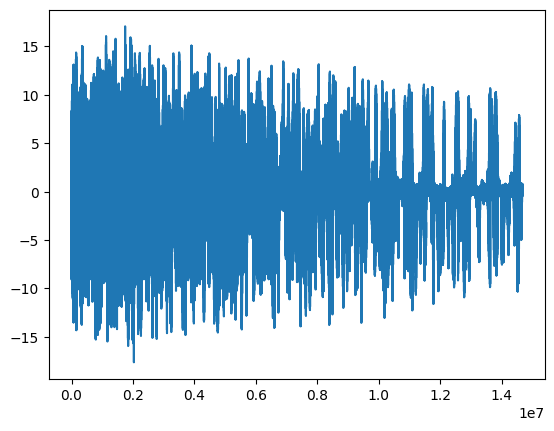

In [7]:
DataNum = len(files_vor)

all_data=[]

for file in files_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

9437184


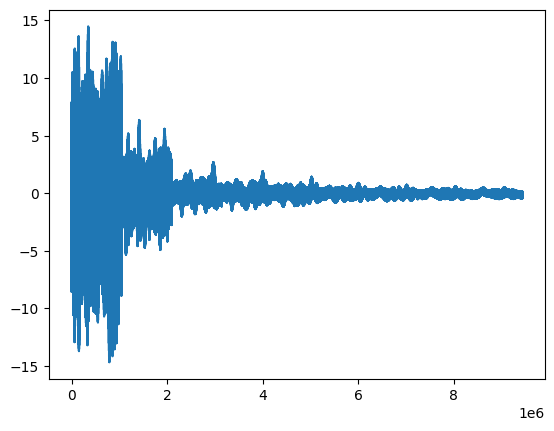

In [8]:
DataNum = len(files2_vor)

all_data=[]

for file in files2_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

## Possibility distribution (Given 'v') ##

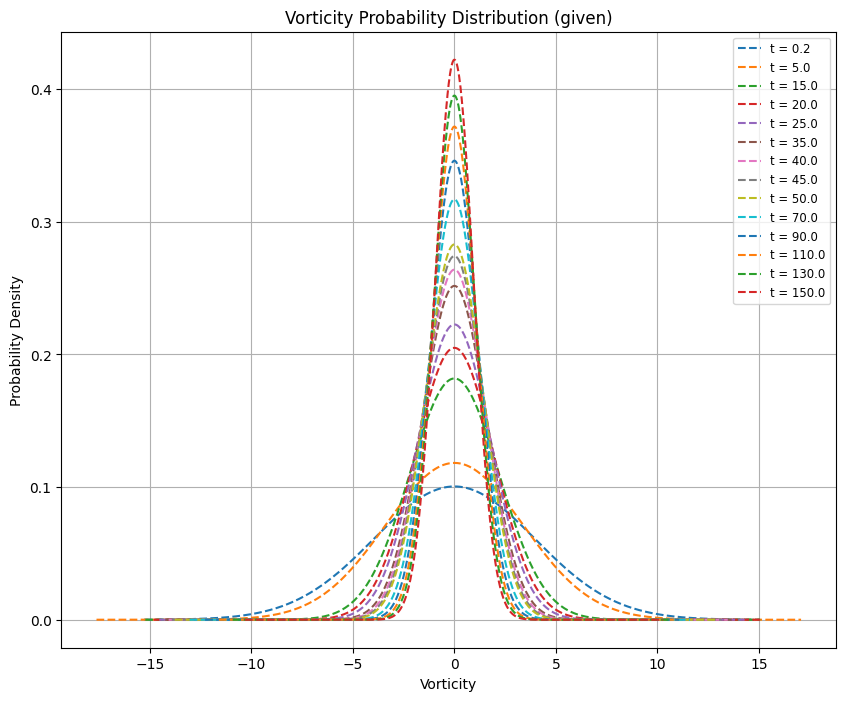

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.9709410611
t = 5.0     |   Sigma = 3.3749762930
t = 15.0    |   Sigma = 2.1938157761
t = 20.0    |   Sigma = 1.9465861269
t = 25.0    |   Sigma = 1.7922937559
t = 35.0    |   Sigma = 1.5852581278
t = 40.0    |   Sigma = 1.5117028696
t = 45.0    |   Sigma = 1.4552467723
t = 50.0    |   Sigma = 1.4100452688
t = 70.0    |   Sigma = 1.2591477608
t = 90.0    |   Sigma = 1.1529162891
t = 110.0   |   Sigma = 1.0731815640
t = 130.0   |   Sigma = 1.0097291717
t = 150.0   |   Sigma = 0.9450240680


In [9]:
std_devs1 = []
mean_devs1 = []
entropies1 = []
time1 = []
sigma1 = []

plt.figure(figsize=(10, 8))

for file in files_vor:
    entropies1, std_devs1, sigma1, mean_devs1, time1= vor_stat(file, entropies1, std_devs1, sigma1, mean_devs1, time1)
                                                               
plt.title("Vorticity Probability Distribution (given)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs1:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

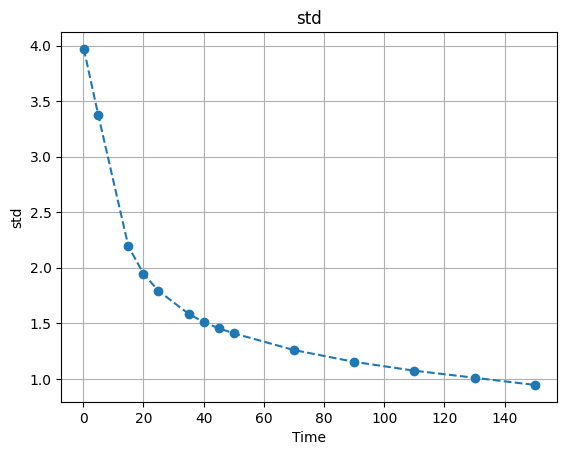

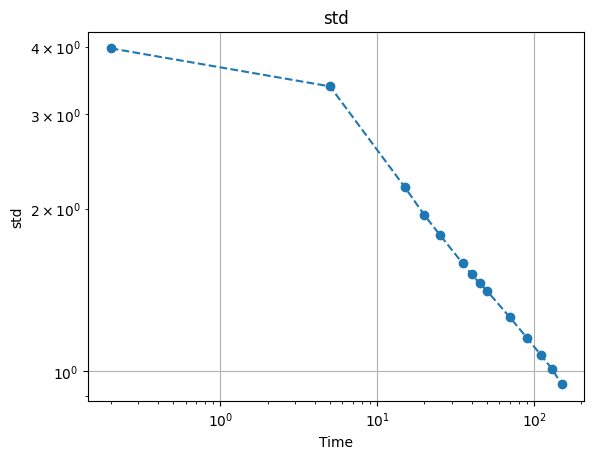

In [10]:
plt.plot(time1, sigma1, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.loglog(time1, sigma1, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

Slope (b)   : -0.3656
Intercept(a): 1.7762  (=> exp(a)=5.9074)


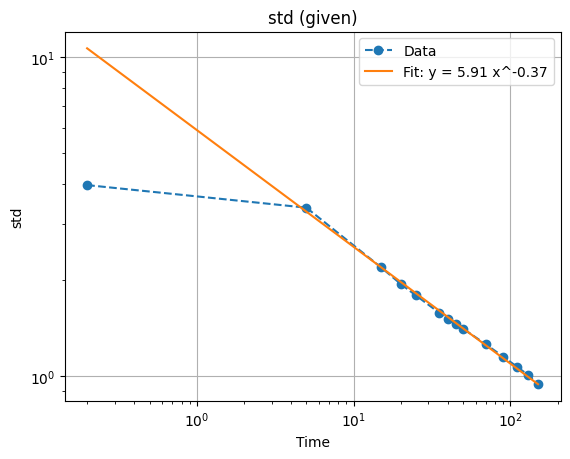

In [11]:
plt.figure()
a1, b1, fitted_sigma1 = fitting(time1, sigma1, 1)

# 시각화 옵션
plt.title("std (given)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()


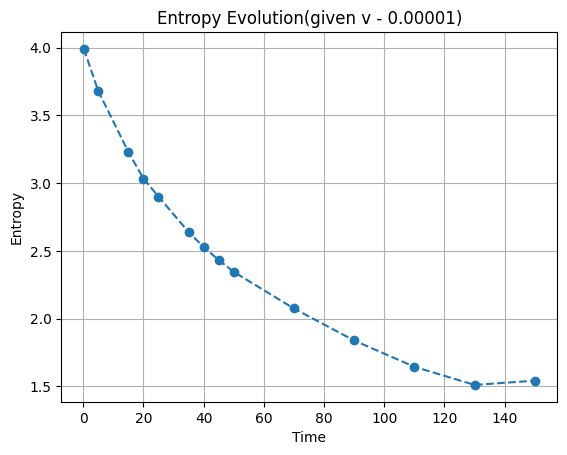

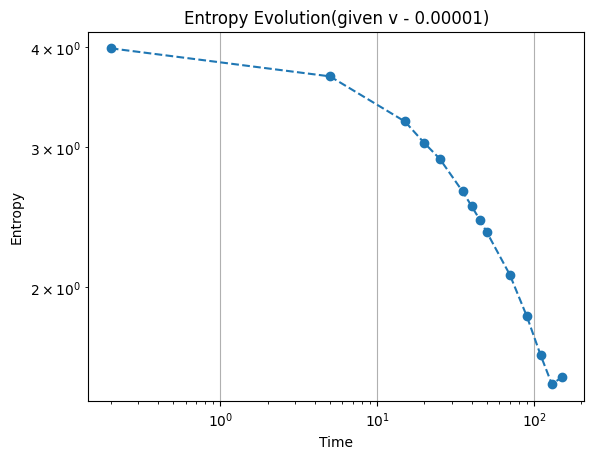

In [12]:
# 엔트로피 변화 시각화
plt.plot(time1, entropies1, marker='o', linestyle='--')
plt.title("Entropy Evolution(given v - 0.00001)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()
plt.loglog(time1, entropies1, marker='o', linestyle='--')
plt.title("Entropy Evolution(given v - 0.00001)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## Possibility distribution (10 times 'v') ##

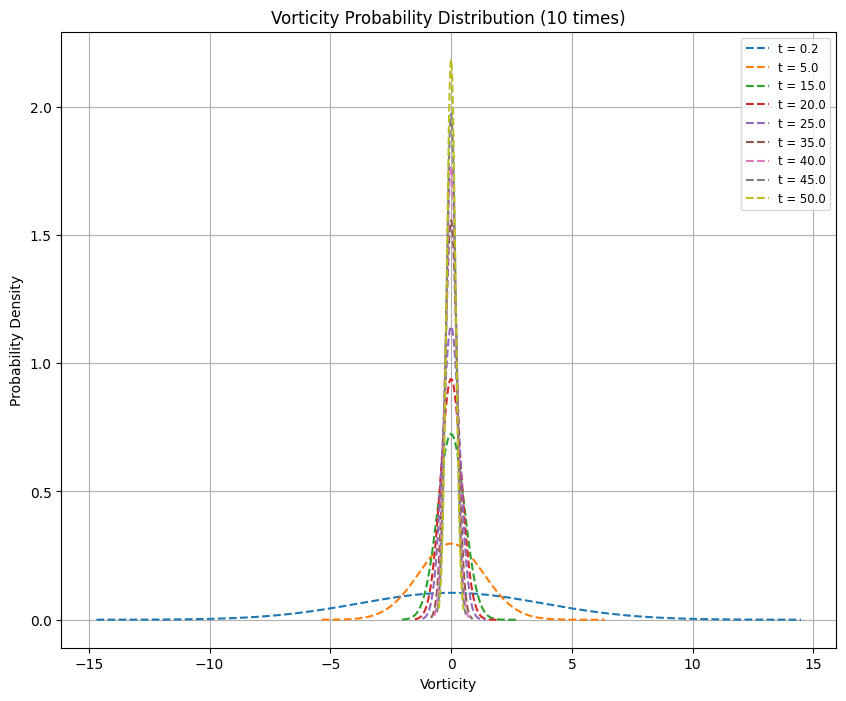

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.8035010122
t = 5.0     |   Sigma = 1.3441899424
t = 15.0    |   Sigma = 0.5512383245
t = 20.0    |   Sigma = 0.4251108222
t = 25.0    |   Sigma = 0.3490216433
t = 35.0    |   Sigma = 0.2562255941
t = 40.0    |   Sigma = 0.2259203371
t = 45.0    |   Sigma = 0.2022806959
t = 50.0    |   Sigma = 0.1827539059


In [13]:
std_devs2 = []
mean_devs2 = []
entropies2 = []
time2 = []
sigma2 = []

plt.figure(figsize=(10, 8))

for file in files2_vor:
    entropies2, std_devs2, sigma2, mean_devs2, time2= vor_stat(file, entropies2, std_devs2, sigma2, mean_devs2, time2)
                                                               
plt.title("Vorticity Probability Distribution (10 times)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs2:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

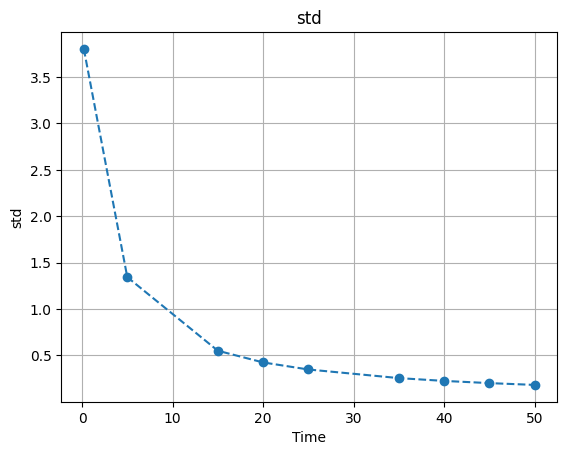

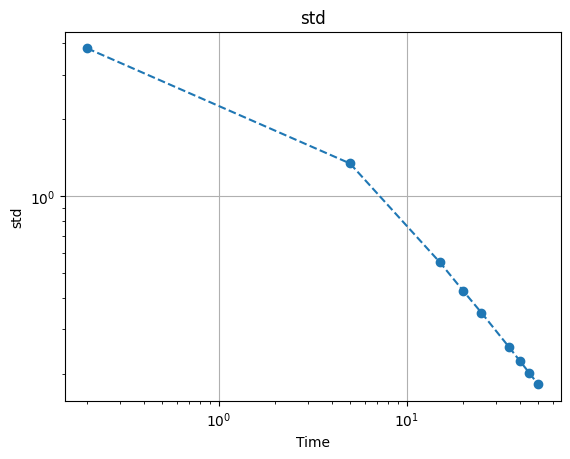

In [14]:
plt.plot(time2, sigma2, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()
plt.loglog(time2, sigma2, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

Slope (b)   : -0.8693
Intercept(a): 1.7259  (=> exp(a)=5.6176)


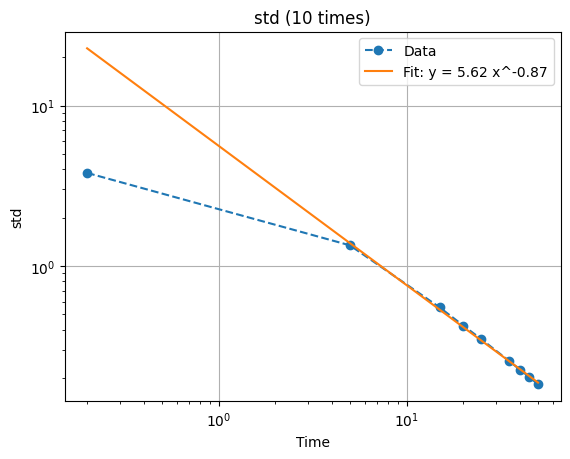

In [15]:
plt.figure()
a2, b2, fitted_sigma2 = fitting(time2, sigma2, 1)

# 시각화 옵션
plt.title("std (10 times)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

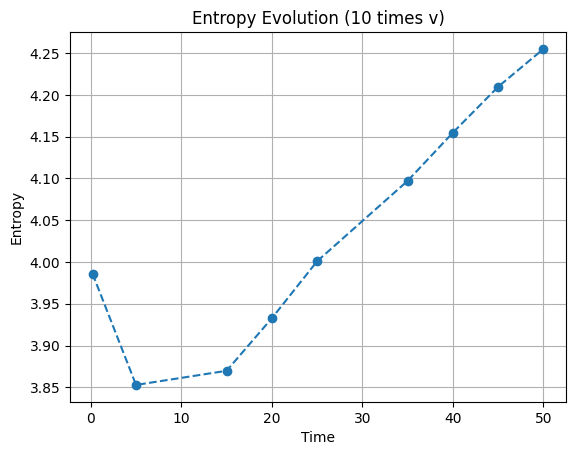

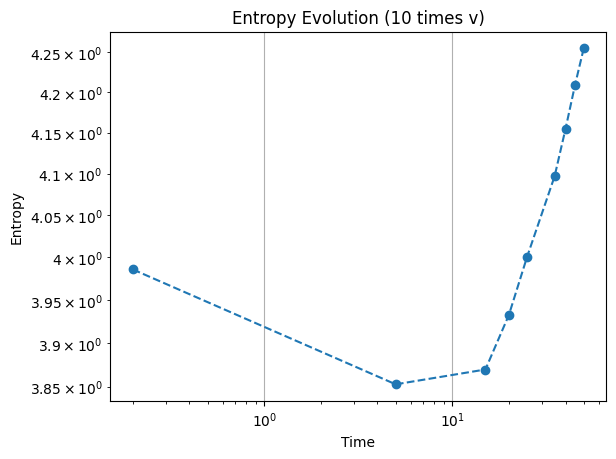

In [16]:
# 엔트로피 변화 시각화
plt.plot(time2, entropies2, marker='o', linestyle='--')
plt.title("Entropy Evolution (10 times v)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

plt.loglog(time2, entropies2, marker='o', linestyle='--')
plt.title("Entropy Evolution (10 times v)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## Half pdf ##

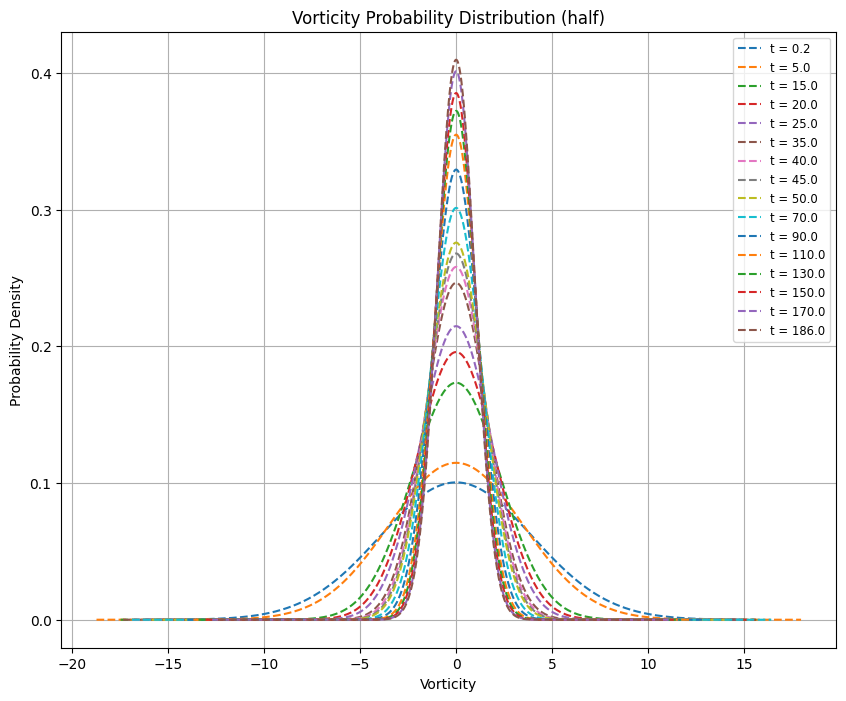

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.9718123127
t = 5.0     |   Sigma = 3.4763860375
t = 15.0    |   Sigma = 2.3015106466
t = 20.0    |   Sigma = 2.0376525668
t = 25.0    |   Sigma = 1.8580442807
t = 35.0    |   Sigma = 1.6192747474
t = 40.0    |   Sigma = 1.5460319396
t = 45.0    |   Sigma = 1.4893495179
t = 50.0    |   Sigma = 1.4464333995
t = 70.0    |   Sigma = 1.3244771323
t = 90.0    |   Sigma = 1.2116837985
t = 110.0   |   Sigma = 1.1245012138
t = 130.0   |   Sigma = 1.0719420833
t = 150.0   |   Sigma = 1.0356025046
t = 170.0   |   Sigma = 0.9945228332
t = 186.0   |   Sigma = 0.9740339146


In [17]:
std_devs3 = []
mean_devs3 = []
entropies3 = []
time3 = []
sigma3 = []

plt.figure(figsize=(10, 8))

for file in files3_vor:
    entropies3, std_devs3, sigma3, mean_devs3, time3= vor_stat(file, entropies3, std_devs3, sigma3, mean_devs3, time3)
                                                               
plt.title("Vorticity Probability Distribution (half)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs3:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

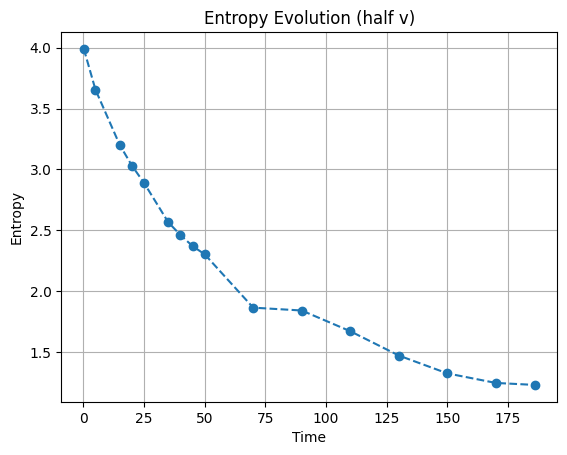

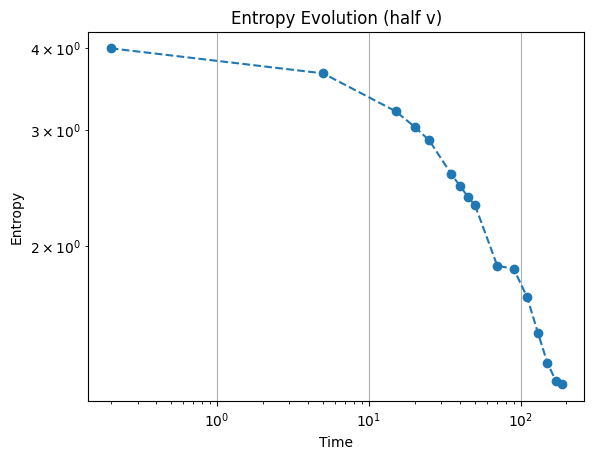

In [18]:
# 엔트로피 변화 시각화
plt.plot(time3, entropies3, marker='o', linestyle='--')
plt.title("Entropy Evolution (half v)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

plt.loglog(time3, entropies3, marker='o', linestyle='--')
plt.title("Entropy Evolution (half v)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

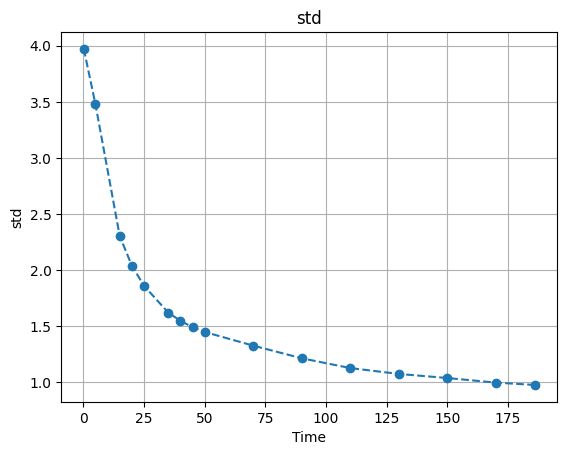

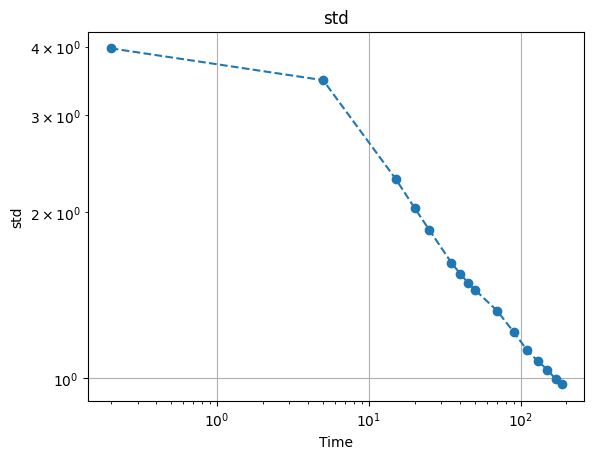

In [19]:
plt.plot(time3, sigma3, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.loglog(time3, sigma3, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

Slope (b)   : -0.3474
Intercept(a): 1.7546  (=> exp(a)=5.7811)


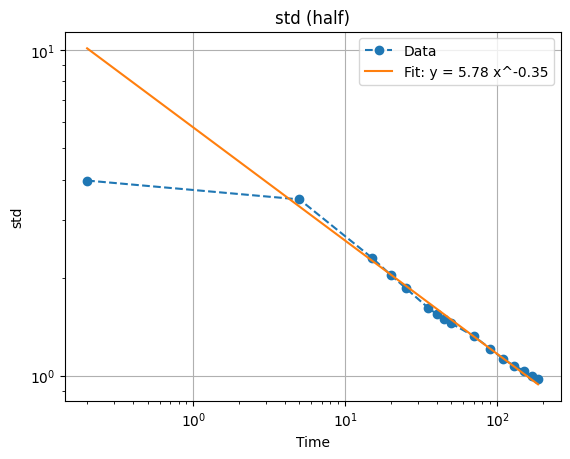

In [35]:
plt.figure()
a3, b3, fitted_sigma3 = fitting(time3, sigma3, 1)

# 시각화 옵션
plt.title("std (half)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

## Regression(from volticity) ##

Time (t)   |   Standard Deviation   |   Time expected
-----------------------------------------------------
t = 0.2     |   Sigma = 3.8035010122   |   3.3342
t = 5.0     |   Sigma = 1.3441899424   |   57.3495
t = 15.0    |   Sigma = 0.5512383245   |   656.7063
t = 20.0    |   Sigma = 0.4251108222   |   1336.5952
t = 25.0    |   Sigma = 0.3490216433   |   2292.2737
t = 35.0    |   Sigma = 0.2562255941   |   5338.3568
t = 40.0    |   Sigma = 0.2259203371   |   7532.3674
t = 45.0    |   Sigma = 0.2022806959   |   10191.1211
t = 50.0    |   Sigma = 0.1827539059   |   13452.6983


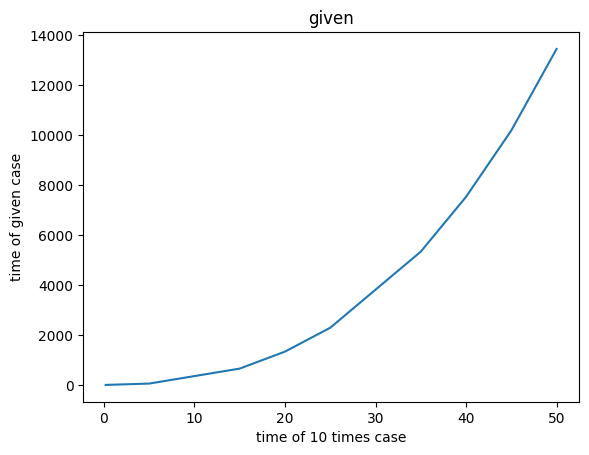

In [39]:
# given case

time_regression1 = []
for i in range (0, 9):
    time = (std_devs2[i][1] / np.exp(a1))**(1/b1)
    time_regression1.append(time)
plt.title('given')
plt.xlabel('time of 10 times case')
plt.ylabel('time of given case')
plt.plot(time2, time_regression1)

print("Time (t)   |   Standard Deviation   |   Time expected")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs2, time_regression1):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

Time (t)   |   Standard Deviation   |   Time expected
-----------------------------------------------------
t = 0.2     |   Sigma = 3.8035010122   |   3.3374
t = 5.0     |   Sigma = 1.3441899424   |   66.6392
t = 15.0    |   Sigma = 0.5512383245   |   867.1453
t = 20.0    |   Sigma = 0.4251108222   |   1831.9076
t = 25.0    |   Sigma = 0.3490216433   |   3231.8701
t = 35.0    |   Sigma = 0.2562255941   |   7867.6686
t = 40.0    |   Sigma = 0.2259203371   |   11303.4297
t = 45.0    |   Sigma = 0.2022806959   |   15537.6353
t = 50.0    |   Sigma = 0.1827539059   |   20811.1157


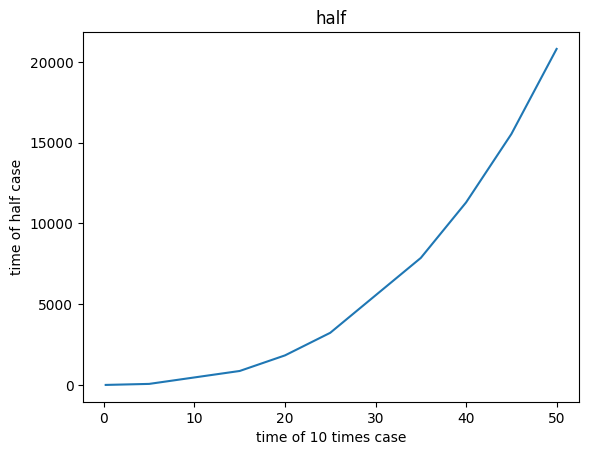

In [40]:
# half case

time_regression3 = []
for i in range (0, 9):
    time = (std_devs2[i][1] / np.exp(a3))**(1/b3)
    time_regression3.append(time)
plt.title('half')
plt.xlabel('time of 10 times case')
plt.ylabel('time of half case')
plt.plot(time2, time_regression3)

print("Time (t)   |   Standard Deviation   |   Time expected")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs2, time_regression3):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

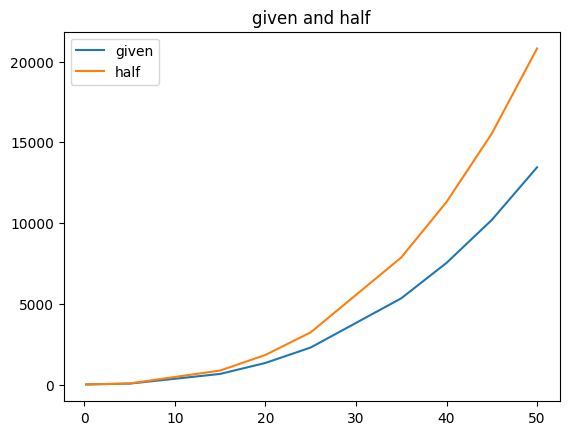

In [43]:
plt.figure()
plt.title('given and half')
plt.plot(time2, time_regression1, label='given')
plt.plot(time2, time_regression3, label='half')
plt.legend()
plt.show()

## U(given) pdf ##

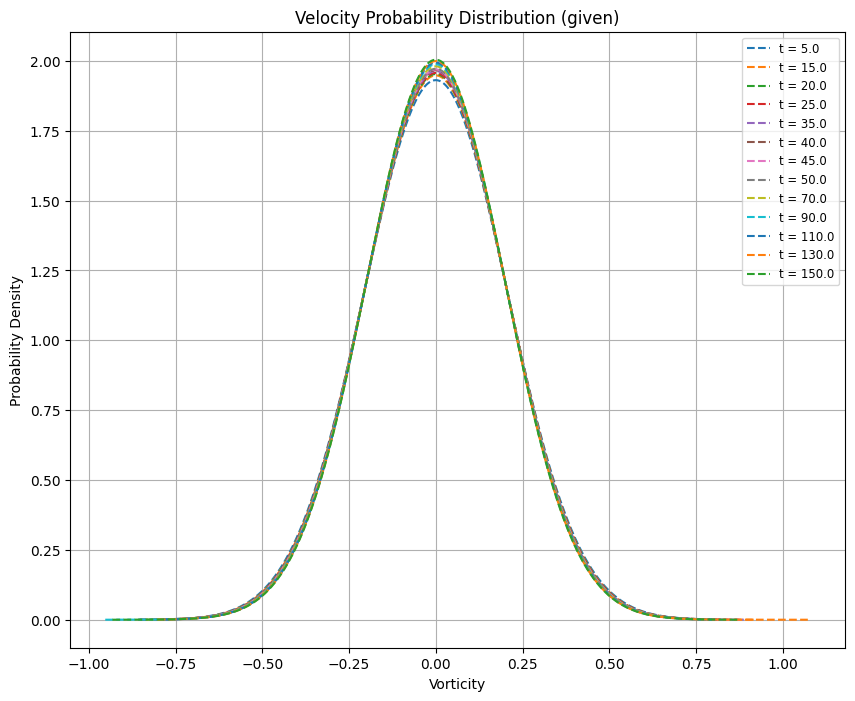

Time (t)   |   Standard Deviation
--------------------------------------
t = 5.0     |   Sigma = 0.2066069499
t = 15.0    |   Sigma = 0.2048107378
t = 20.0    |   Sigma = 0.2042860569
t = 25.0    |   Sigma = 0.2038559771
t = 35.0    |   Sigma = 0.2031557414
t = 40.0    |   Sigma = 0.2028595201
t = 45.0    |   Sigma = 0.2025879223
t = 50.0    |   Sigma = 0.2023338543
t = 70.0    |   Sigma = 0.2014442929
t = 90.0    |   Sigma = 0.2007170255
t = 110.0   |   Sigma = 0.2001016099
t = 130.0   |   Sigma = 0.1995527929
t = 150.0   |   Sigma = 0.1990729662


In [24]:
std_devs_u = []
mean_devs_u = []
entropies_u = []
time_u = []
sigma_u = []

plt.figure(figsize=(10, 8))

for file in files:
    t = float(file.split('/')[-1].split('_')[0])
    if t==0:
        continue
    entropies_u, std_devs_u, sigma_u, mean_devs_u, time_u = vel_stat(file, entropies_u, std_devs_u, sigma_u, mean_devs_u, time_u)

plt.title("Velocity Probability Distribution (given)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs_u:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

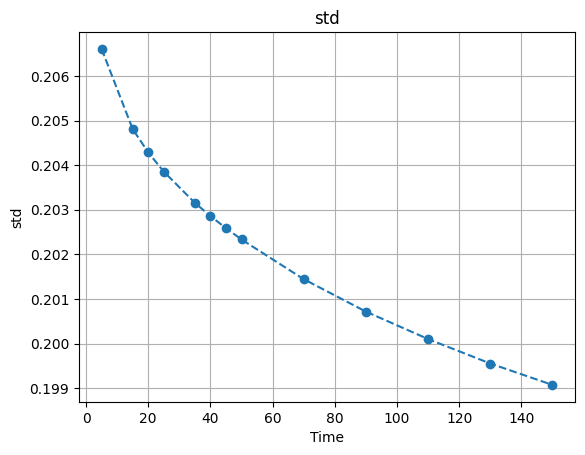

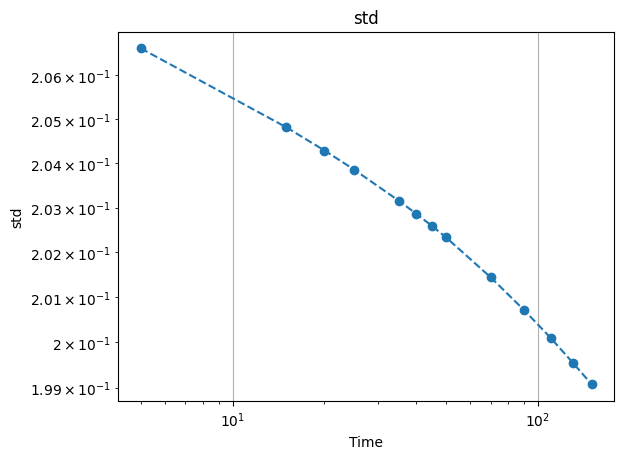

In [25]:
plt.plot(time_u, sigma_u, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()
plt.loglog(time_u, sigma_u, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

Slope (b)   : -0.0166
Intercept(a): -1.5308  (=> exp(a)=0.2164)


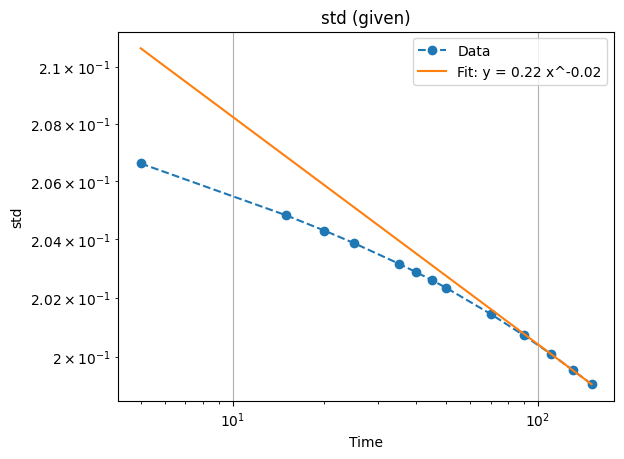

In [26]:
plt.figure()
a_u, b_u, fitted_sigma_u = fitting(time_u, sigma_u, -3)

# 시각화 옵션
plt.title("std (given)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

## U(10 times) pdf ##

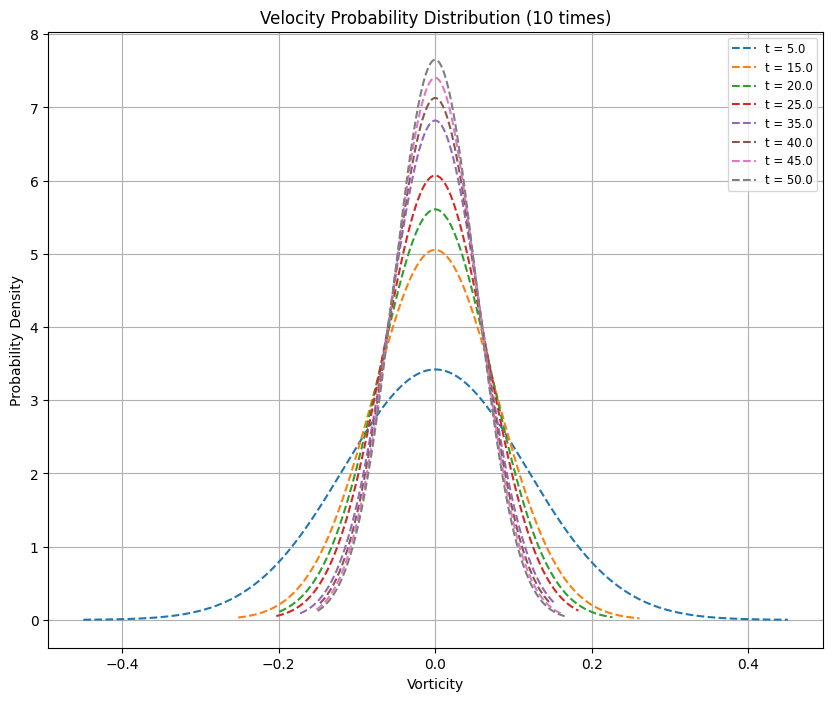

Time (t)   |   Standard Deviation
--------------------------------------
t = 5.0     |   Sigma = 0.1166312320
t = 15.0    |   Sigma = 0.0789406084
t = 20.0    |   Sigma = 0.0711378957
t = 25.0    |   Sigma = 0.0657317633
t = 35.0    |   Sigma = 0.0584916116
t = 40.0    |   Sigma = 0.0559657412
t = 45.0    |   Sigma = 0.0538848707
t = 50.0    |   Sigma = 0.0521415984


In [27]:
std_devs_u2 = []
mean_devs_u2 = []
entropies_u2 = []
time_u2 = []
sigma_u2 = []

plt.figure(figsize=(10, 8))

for file in files2:
    t = float(file.split('/')[-1].split('_')[0])
    if t==0:
        continue
    entropies_u2, std_devs_u2, sigma_u2, mean_devs_u2, time_u2 = vel_stat(file, entropies_u2, std_devs_u2, sigma_u2, mean_devs_u2, time_u2)

plt.title("Velocity Probability Distribution (10 times)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs_u2:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

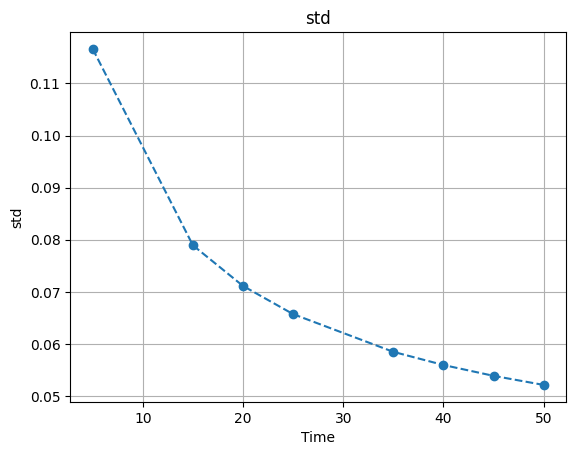

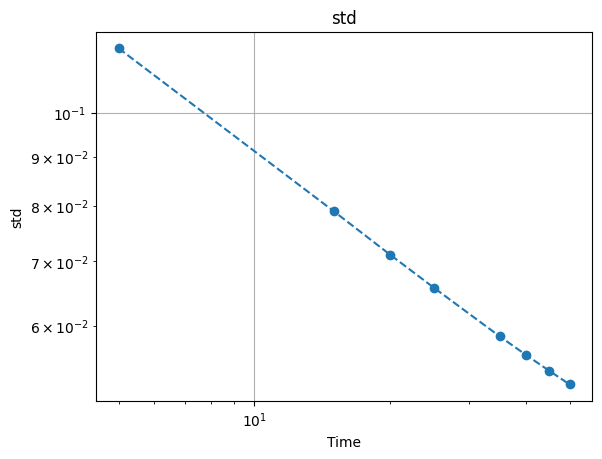

In [28]:
plt.plot(time_u2, sigma_u2, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()
plt.loglog(time_u2, sigma_u2, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

Slope (b)   : -0.3451
Intercept(a): -1.6084  (=> exp(a)=0.2002)


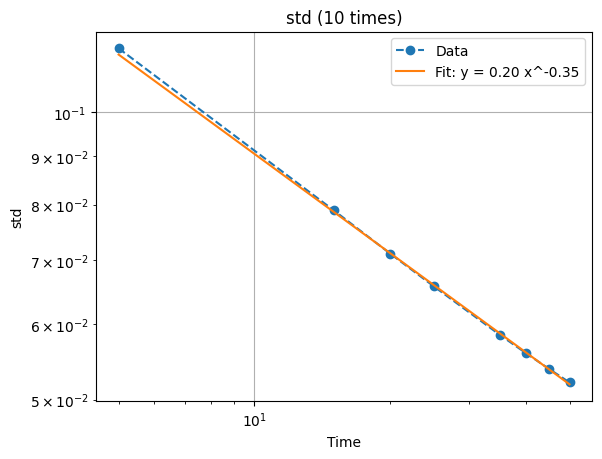

In [44]:
plt.figure()
a_u2, b_u2, fitted_sigma_u2 = fitting(time_u2, sigma_u2, 1)

# 시각화 옵션
plt.title("std (10 times)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

## U(half) pdf ##

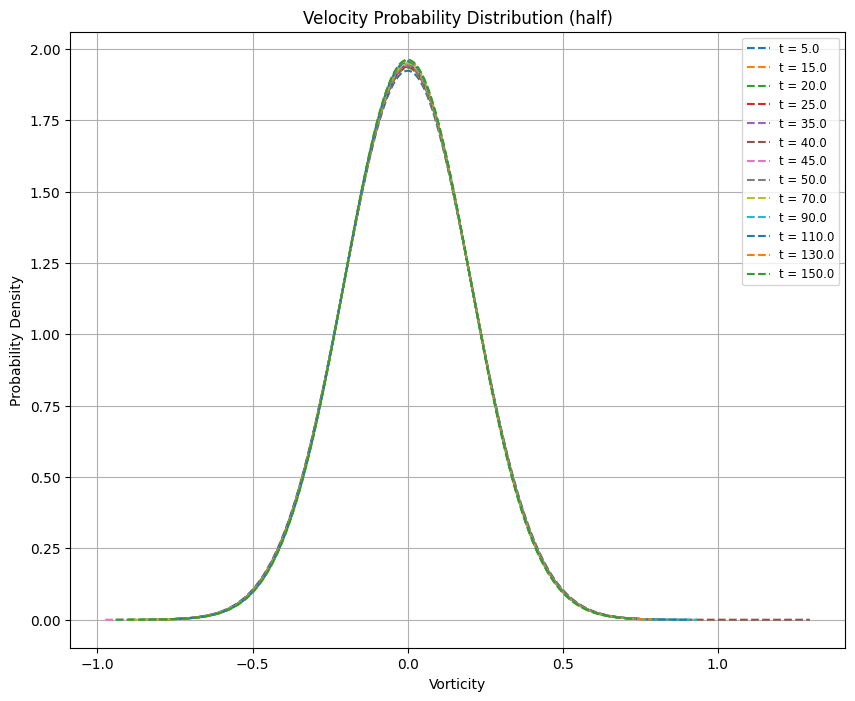

Time (t)   |   Standard Deviation
--------------------------------------
t = 5.0     |   Sigma = 0.2074433467
t = 15.0    |   Sigma = 0.2064558775
t = 20.0    |   Sigma = 0.2061666559
t = 25.0    |   Sigma = 0.2059318291
t = 35.0    |   Sigma = 0.2055620148
t = 40.0    |   Sigma = 0.2054069878
t = 45.0    |   Sigma = 0.2052654754
t = 50.0    |   Sigma = 0.2051313136
t = 70.0    |   Sigma = 0.2046568599
t = 90.0    |   Sigma = 0.2042604135
t = 110.0   |   Sigma = 0.2039237865
t = 130.0   |   Sigma = 0.2036264451
t = 150.0   |   Sigma = 0.2033504507


In [30]:
std_devs_u3 = []
mean_devs_u3 = []
entropies_u3 = []
time_u3 = []
sigma_u3 = []

plt.figure(figsize=(10, 8))

for file in files3:
    t = float(file.split('/')[-1].split('_')[0])
    if t==0:
        continue
    entropies_u3, std_devs_u3, sigma_u3, mean_devs_u3, time_u3 = vel_stat(file, entropies_u3, std_devs_u3, sigma_u3, mean_devs_u3, time_u3)

plt.title("Velocity Probability Distribution (half)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs_u3:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

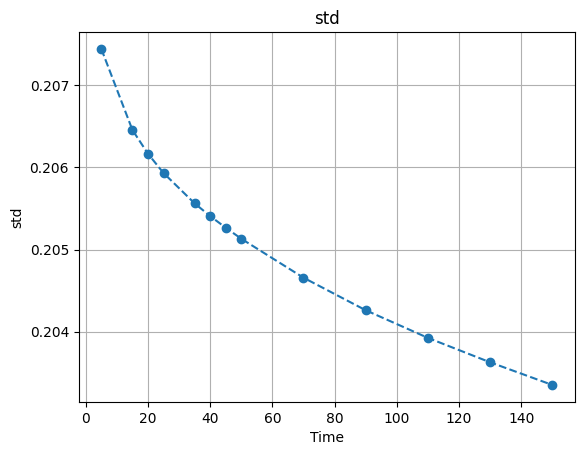

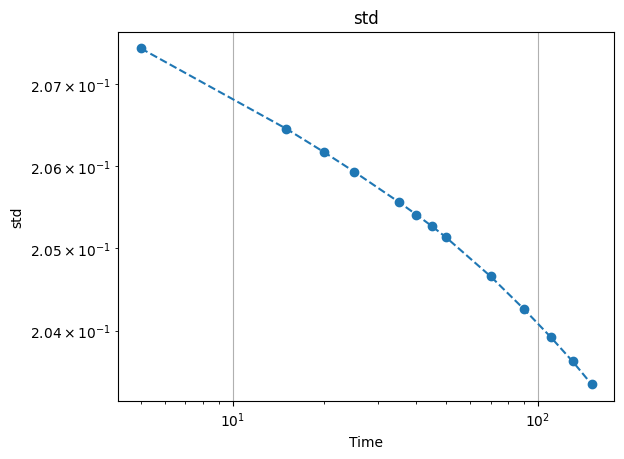

In [31]:
plt.plot(time_u3, sigma_u3, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()
plt.loglog(time_u3, sigma_u3, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

Slope (b)   : -0.0091
Intercept(a): -1.5474  (=> exp(a)=0.2128)


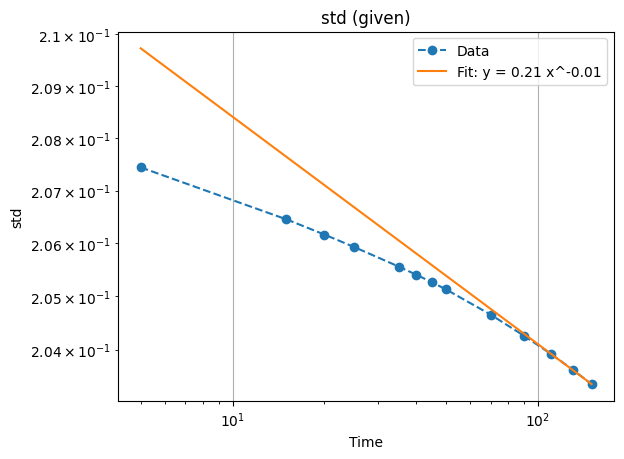

In [32]:
plt.figure()
a_u3, b_u3, fitted_sigma_u3 = fitting(time_u3, sigma_u3, -3)

# 시각화 옵션
plt.title("std (given)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

## Regression(from velocity) ##

Time (t)   |   Standard Deviation   |   Time expected (s)
-----------------------------------------------------
t = 5.0     |   Sigma = 0.1166312320   |   14253061707512166.0000
t = 15.0    |   Sigma = 0.0789406084   |   228103155817964468504100864.0000
t = 20.0    |   Sigma = 0.0711378957   |   119948167543616219727018328064.0000
t = 25.0    |   Sigma = 0.0657317633   |   13973094704763367846853774147584.0000
t = 35.0    |   Sigma = 0.0584916116   |   15709711279678916301542873767084032.0000
t = 40.0    |   Sigma = 0.0559657412   |   223985898099371943812720406879535104.0000
t = 45.0    |   Sigma = 0.0538848707   |   2191714007150812617494035383139172352.0000
t = 50.0    |   Sigma = 0.0521415984   |   15868830567988868331402308543060115456.0000


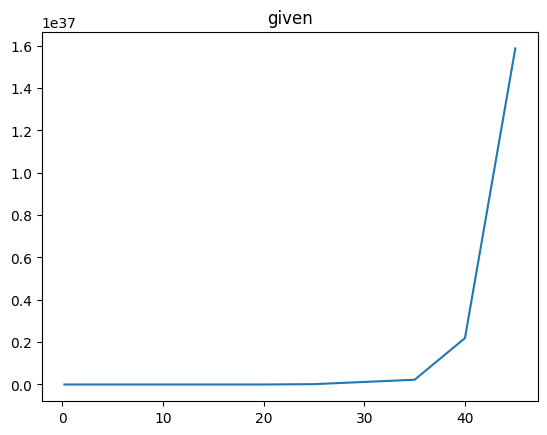

In [33]:
# given case
time_regression_u1 = []
for i in range (0, 8):
    time = (std_devs_u2[i][1] / np.exp(a_u))**(1/b_u)
    time_regression_u1.append(time)
plt.title('given')
plt.plot(time2[:-1], time_regression_u1)

print("Time (t)   |   Standard Deviation   |   Time expected (s)")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs_u2, time_regression_u1):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

Time (t)   |   Standard Deviation   |   Time expected (s)
-----------------------------------------------------
t = 5.0     |   Sigma = 0.1166312320   |   63243681446490930946395602944.0000
t = 15.0    |   Sigma = 0.0789406084   |   312155211373387673668132715936208343480013946880.0000
t = 20.0    |   Sigma = 0.0711378957   |   30114905234272432591611743118963415731588601112166400.0000
t = 25.0    |   Sigma = 0.0657317633   |   183688776950162403213444509118396137673171166745694568448.0000
t = 35.0    |   Sigma = 0.0584916116   |   71293924822291565834876042105335144439876233710685152593575936.0000
t = 40.0    |   Sigma = 0.0559657412   |   9272312585281520286715751380990228537621672984953667238599065600.0000
t = 45.0    |   Sigma = 0.0538848707   |   605095354027780972481776021335860461010330597807737290352391880704.0000
t = 50.0    |   Sigma = 0.0521415984   |   22742596406709389555420306691650926536805241510620356724148028833792.0000


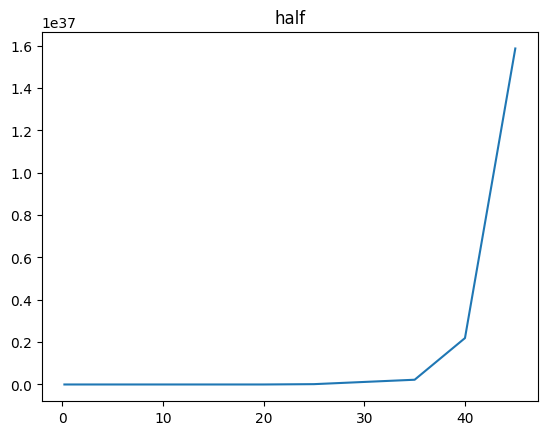

In [34]:
# half case
time_regression_u3 = []
for i in range (0, 8):
    time = (std_devs_u2[i][1] / np.exp(a_u3))**(1/b_u3)
    time_regression_u3.append(time)
plt.title('half')
plt.plot(time2[:-1], time_regression_u1)

print("Time (t)   |   Standard Deviation   |   Time expected (s)")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs_u2, time_regression_u3):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")